In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# import matplotlib
# import cartopy as cart
# import cartopy.crs as ccrs
# import cmocean.cm as cmo
# import seaborn as sns
# from glob import glob

import pandas as pd
import gsw
import xarray as xr

In [5]:
sim = xr.load_dataset('../data/simulations/backtrack_samplinglocation5170.nc')

In [27]:
sim['salinity'][:,8]

<xarray.DataArray 'salinity' (traj: 10000)>
array([34.738625, 34.738625, 34.738617, ..., 34.738625, 34.738625,
       34.738625], dtype=float32)
Dimensions without coordinates: traj
Attributes:
    long_name:      
    standard_name:  salinity
    units:          unknown

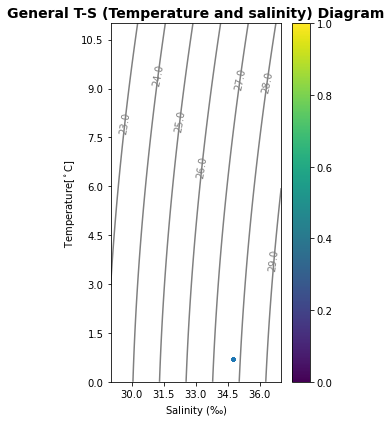

In [26]:
tempL=np.linspace(1-1,10+1,156)

salL=np.linspace(30-1,36+1,156)

Tg, Sg = np.meshgrid(tempL,salL)
sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

fig, ax = plt.subplots(figsize=(4,6))
cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

sc = plt.scatter(sim['salinity'][:, 6], sim['temperature'][:, 6], s=10)
cb = plt.colorbar(sc)

ax.set_xlabel('Salinity ($‰$)')
ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('General T-S (Temperature and salinity) Diagram',fontsize=14, fontweight='bold')
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.yaxis.set_major_locator(MaxNLocator(nbins=8))
ax.tick_params(direction='out')
# cb.ax.tick_params(direction='out')
# cb.set_label('Density[kg m$^{-3}$]')
plt.tight_layout()
# plt.savefig(‘ts_diagram.png’,format=’png’,dpi=900,transparent=False)